# STRATEGIC CAPABILITIES AND COMPETITIVE ADVANTAGE STUDY

In [1]:
# Study topic
#INFLUENCE OF STRATEGIC CAPABILITIES ON THE COMPETITIVE ADVANTAGE IN SUGAR COMPANIES IN WESTERN KENYA

In [2]:
# Study Objectives
#1.	To assess the influence of human resource capability on competitive advantage in sugar companies in Western Kenya.
#2.	To determine the influence of technology capability on competitive advantage in sugar companies in Western Kenya.
#3.	To establish the influence of material capability on competitive advantage in sugar companies in Western Kenya.
#4.	To assess the influence of financial resources capability on competitive advantage in sugar companies in Western Kenya.
#5.	To determine the moderating influence of Government regulatory policy on the relationship between strategic capabilities and competitive advantage in sugar companies in Western Kenya.

In [3]:
#Study Hypotheses
#1.	H0: There is no significant relationship between human resource capability and competitive advantage in sugar companies in Western Kenya.
#2.	H0: There is no significant relationship between technology capability and competitive advantage in sugar companies in Western Kenya.
#3.	H0: There is no significant relationship between material capability and competitive advantage in sugar companies in Western Kenya.
#4.	H0: There is no significant relationship between financial resources capability and competitive advantage in sugar companies in Western Kenya.
#5.	H0: The government regulatory policy does not moderate the relationship between strategic capabilities and competitive advantage in sugar companies in Western Kenya.

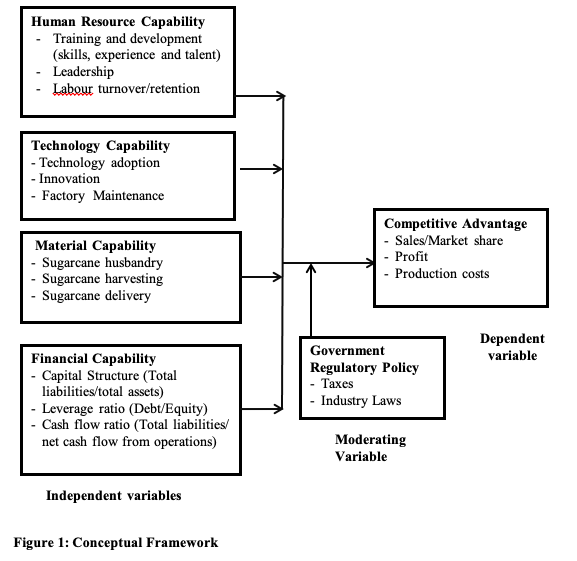

In [4]:
#Importing the Conceptual Framework
from IPython.display import Image
Image(filename='Cf.png')

In [23]:
# Loading the training dataset  
strategic_capability=pd.read_csv('Strategic_Capabilities.csv') 

In [24]:
# Defining the dependent and independent variables 
Xtrain = strategic_capability[['HumanResourceCapability','TechnologyCapability','MaterialsCapability','FinancialCapability','GovernmentRegulation']] 
ytrain = strategic_capability[['CompetitiveAdvantage']] 

In [25]:
# Counting the y values
strategic_capability ['CompetitiveAdvantage'].value_counts()

1    38
0    26
Name: CompetitiveAdvantage, dtype: int64

In [26]:
# Exploring the  data
strategic_capability.describe()

,HumanResourceCapability,TechnologyCapability,MaterialsCapability,FinancialCapability,GovernmentRegulation,CompetitiveAdvantage
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,108.796875,78.078125,86.750000,61.281250,28.203125,0.593750
std,22.708770,19.128060,19.815018,11.733102,4.938285,0.495015
min,70.000000,42.000000,30.000000,39.000000,21.000000,0.000000
25%,93.000000,66.750000,74.750000,56.750000,24.750000,0.000000
50%,111.000000,80.500000,86.000000,59.500000,26.000000,1.000000
75%,120.250000,90.250000,101.000000,63.000000,32.000000,1.000000
max,191.000000,115.000000,151.000000,117.000000,39.000000,1.000000


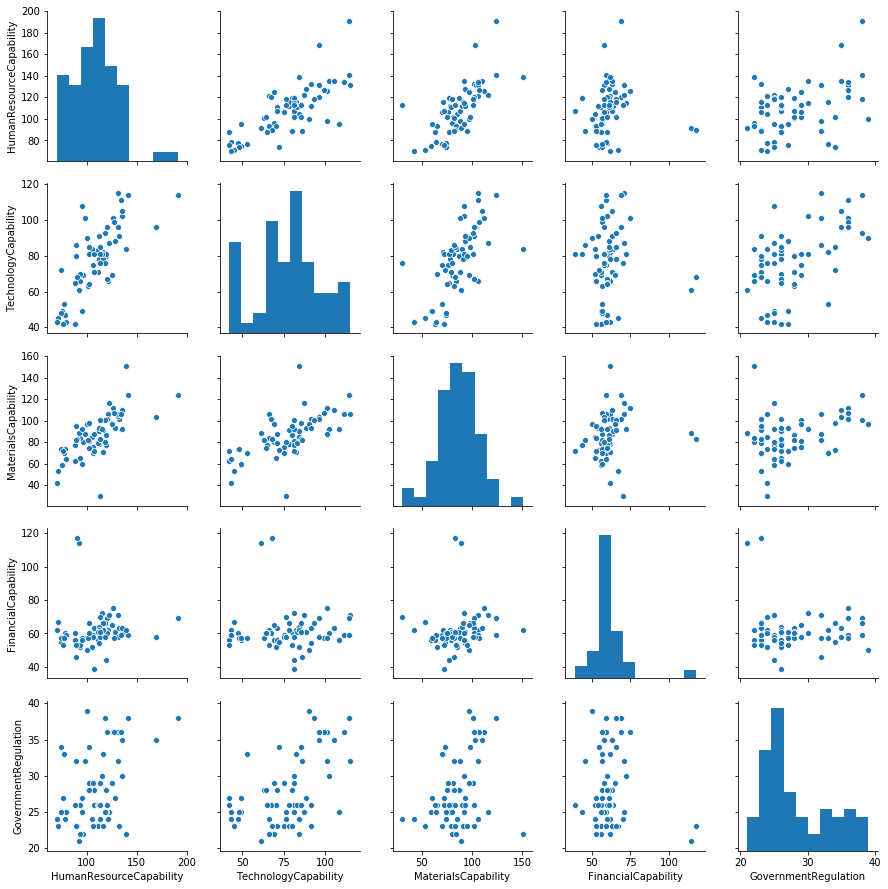

In [27]:
sns.pairplot(Xtrain)

In [28]:
# Splitting the data for training and testing 
Xtrain,Xtest,ytrain,ytest=train_test_split(Xtrain,ytrain,train_size=0.7,test_size=0.3,random_state=1)

In [29]:
# Building the model and fitting the data 
log_reg = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.403829
         Iterations 7


In [30]:
# Printing the summary table 
print(log_reg.summary()) 

                            Logit Regression Results                            
Dep. Variable:     CompetitiveAdvantage   No. Observations:                   44
Model:                            Logit   Df Residuals:                       39
Method:                             MLE   Df Model:                            4
Date:                  Thu, 31 Dec 2020   Pseudo R-squ.:                  0.3839
Time:                          18:21:55   Log-Likelihood:                -17.768
converged:                         True   LL-Null:                       -28.841
Covariance Type:              nonrobust   LLR p-value:                 0.0001875
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
HumanResourceCapability     0.0385      0.043      0.895      0.371      -0.046       0.123
TechnologyCapability        0.0840      0.048      1.758      0.079      -0.

In [31]:
# Correlation analysis
strategic_capability.corr()

,HumanResourceCapability,TechnologyCapability,MaterialsCapability,FinancialCapability,GovernmentRegulation,CompetitiveAdvantage
HumanResourceCapability,1.000000,0.751747,0.698337,0.066166,0.433780,0.656202
TechnologyCapability,0.751747,1.000000,0.678531,-0.000099,0.574862,0.675630
MaterialsCapability,0.698337,0.678531,1.000000,0.132894,0.403143,0.615746
FinancialCapability,0.066166,-0.000099,0.132894,1.000000,-0.098802,0.200358
GovernmentRegulation,0.433780,0.574862,0.403143,-0.098802,1.000000,0.352464
CompetitiveAdvantage,0.656202,0.675630,0.615746,0.200358,0.352464,1.000000


In [32]:
# Performing predictions on the test datdaset 
yhat = log_reg.predict(Xtest) 
prediction = list(map(round, yhat)) 

In [33]:
# Comparing original and predicted values of y 
print('Acutal values', list(ytest.values)) 
print('Predictions :', prediction) 

Acutal values [array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1])]
Predictions : [1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1]


In [34]:
#Importing the libraries for confusion matrix
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score)

In [35]:
#Evaluating the model
# Model Accuracy confusion matrix 
cm = confusion_matrix(ytest, prediction)  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[7 3]
 [2 8]]


In [36]:

# accuracy score of the model 
print('Test accuracy = ', accuracy_score(ytest, prediction))

Test accuracy =  0.75


In [44]:
#Importing library
import statsmodels.api as sm
from statsmodels.formula.api import ols
#Hypothesis Testing 1
#1.H0: There is no significant relationship between human resource capability and competitive advantage in sugar companies in Western Kenya
log_reg=ols('CompetitiveAdvantage ~ HumanResourceCapability',data=strategic_capability).fit()
aov_table=sm.stats.anova_lm(log_reg,typ=2)
print(aov_table)


                           sum_sq    df          F        PR(>F)
HumanResourceCapability  6.647412   1.0  46.886853  3.947250e-09
Residual                 8.790088  62.0        NaN           NaN


In [49]:
#Hypothesis Testing 1 interpretation:
#We reject the null hypothesis that there is no significant relationship between human resource capability and competitive advantage in sugar companies in Western Kenya. 

In [45]:
#2.H0: There is no significant relationship between technology capability and competitive advantage in sugar companies in Western Kenya.
log_reg=ols('CompetitiveAdvantage ~ TechnologyCapability',data=strategic_capability).fit()
aov_table=sm.stats.anova_lm(log_reg,typ=2)
print(aov_table)

                       sum_sq    df          F        PR(>F)
TechnologyCapability  7.04685   1.0  52.070425  9.084815e-10
Residual              8.39065  62.0        NaN           NaN


In [ ]:
#Hypothesis Testing 2 interpretation:
#We therefore reject the null hypothesis that there is no significant relationship between technology capability and competitive advantage in sugar companies in Western Kenya.
#The conclusion therefore is that there is a significant relationship between technology capability and competitive advantage in sugar companies in Western Kenya.

In [46]:
#3.H0: There is no significant relationship between material capability and competitive advantage in sugar companies in Western Kenya.
log_reg=ols('CompetitiveAdvantage ~ MaterialsCapability',data=strategic_capability).fit()
aov_table=sm.stats.anova_lm(log_reg,typ=2)
print(aov_table)

                       sum_sq    df          F        PR(>F)
MaterialsCapability  5.853018   1.0  37.861942  6.121207e-08
Residual             9.584482  62.0        NaN           NaN


In [ ]:
#Hypothesis Testing 3 interpretation:
#We therefore reject the null hypothesis that there is no significant relationship between material capability and competitive advantage in sugar companies in Western Kenya.
#It is therefore concluded that there is a significant relationship between material capability and competitive advantage in sugar companies in Western Kenya.

In [47]:
#4.H0: There is no significant relationship between material capability and competitive advantage in sugar companies in Western Kenya.
log_reg=ols('CompetitiveAdvantage ~ FinancialCapability',data=strategic_capability).fit()
aov_table=sm.stats.anova_lm(log_reg,typ=2)
print(aov_table)

                        sum_sq    df         F    PR(>F)
FinancialCapability   0.619712   1.0  2.592974  0.112419
Residual             14.817788  62.0       NaN       NaN


In [ ]:
#Hypothesis Testing 4 interpretation:
#We fail to reject the null hypothesis that there is no significant relationship between financial resources capability and competitive advantage in sugar companies in Western Kenya.

In [48]:
#5.H0: The government regulatory policy does not moderate the relationship between strategic capabilities and competitive advantage in sugar companies in Western Kenya.
log_reg=ols('CompetitiveAdvantage ~ GovernmentRegulation',data=strategic_capability).fit()
aov_table=sm.stats.anova_lm(log_reg,typ=2)
print(aov_table)

                         sum_sq    df         F    PR(>F)
GovernmentRegulation   1.917816   1.0  8.794922  0.004284
Residual              13.519684  62.0       NaN       NaN


In [ ]:
#Hypothesis Testing 4 interpretation:
#We therefore reject the null hypothesis that the government regulatory policy does not moderate the relationship between strategic capabilities and competitive advantage in sugar companies in Western Kenya.
#We adopt the H1: Government regulatory policy significantly moderates the relationship between strategic capabilities and competitive advantage in sugar companies in Western Kenya.